****
<a id='lesson-2'></a>
# Lesson-2: Logistic Map
****

## Map:
Map is a mathematical construct that takes an object and returns another object of same type. Usually, the map is iterated multiple times to test for reaching a 'constant' value i.e. steady state

Example: the operation of a map $f$ may written as: <br>
  $x_1=f(x_0)$ <br>
where the map $f$ transform the input $x_0$ to its new value $x_1$.

## Logistical map
Logistic map is a quadratic map; i.e. $f(x)$ is a quadratic ploynomial. 
It shows a particularly interesting phenomena of 'deterministic chaos' i.e. a deterministic map showing apparently random behaviour.  Logistic map has a single parameter, named $\alpha$, and is given by: <br>
$f(x)=\alpha x(1-x)$<br>
When $0\le \alpha \le 4$, the map takes an input $0\le x \le 1$ to give an output in the same range. For a particular value of the parameter $\alpha$, we want to find the behaviour of the map. For such systems, plot of $x_{n}$ vs $x_{n+1}$ is called phase plot and is a important tool for visualising and analysing such systems. 

We will explore this in this tutorial using phase plots.

You can find good detail on Logistic Map at: https://en.wikipedia.org/wiki/Logistic_map

## Task-1
Write a function that will take as input the following: 
1. parameter value $\alpha$
1. starting value for $x$
1. number of iterations to run

Tasks:
1. Task is to plot the $n$ vs. $x_n$, where $x_n=f(x_{n-1})$ and $x_0=x$.
1. For a fixed $\alpha$ and do the above plot for various $0\le x_0 \le 1$. 
1. Repeat above steps for the following values of $\alpha$: 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.25, 3.4, 5.52
1. Comment



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
a=5.52

alpha = 5.52
The following plots are for x0=0,0.25,0.5,0.75,1 respectively.


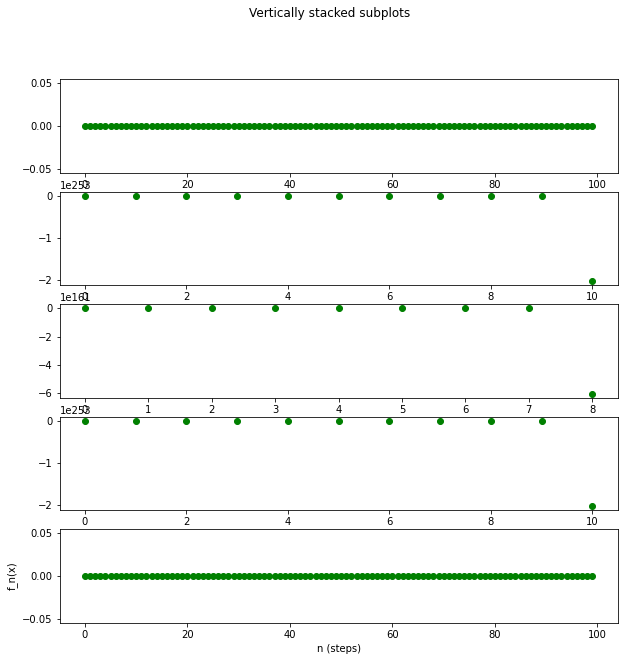

In [34]:
fig, axs = plt.subplots(5,figsize=(10,10))
fig.suptitle('Vertically stacked subplots')
xx=[0,0.25,0.5,0.75,1]
def func(no,x,alp,i):
    if(no==0):
        return 0
    else:
        axs[i].scatter(n-no,alp*x*(1-x), color="green")
        func(no-1,alp*x*(1-x),alp,i)
for i in range(5):
    p=func(n,xx[i-1],a,i-1)

plt.xlabel('n (steps)')
plt.ylabel('f_n(x)')
print("alpha = 5.52")
print("The following plots are for x0=0,0.25,0.5,0.75,1 respectively.")

Text(0, 0.5, 'f_n(x)')

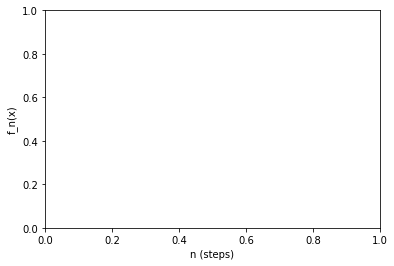

Observations:
For x=0 and x=1, function stays at 0. 
Rest of the graphs vary with alpha and initial value x (but look exponential)

## Task-2
Write a function that will take values for $x$, $\alpha$ and the number of steps and plot the Phase Plot for these steps.



In [305]:
a=float(input())
x0=float(input())
n=float(input())

2.5
0.5
1


In [314]:
def func1():
    x=np.arange(0,1,0.00001)
    y=a*x*(1-x)
    plt.plot(x,y,label='f(x)')
    plt.xlabel('x_n')
    plt.ylabel('x_(n+1)')
   

Text(0.5, 1.0, 'Phase plot of a logistic map')

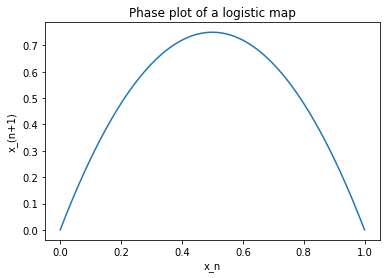

In [315]:
p=func1()
plt.title('Phase plot of a logistic map')

Observation: Graph will be a reverse parabola and shows how the function varies with current and last step.

## Task-3
Write a function, for a particular value of $\alpha$, to determine steady states and cycles (lets denote these values as $x^*(\alpha)$.<br>

Solution: consider $f(x)$, $f(f(x))=f^2(x)$, $f^3(x)$,...,$f^n(x)$.  


### Strategy to solve this task: to find the steady-state or cycle for a given $\alpha$

1. Find roots of $f^{(n)}-x=0$, where $f^{(n)}$ is the $n^{th}$ iteration of the map; i.e. $f^{(3)}(x)=f(f(f(x)))$
2. Check the stability of the roots. 
1. If all roots are unstable, then increase n by 1 and goto step 1
1. If even one root is stable, then we have found the steady-state/cycle.

Alternatively: 
$ \frac{d}{dx} f^{(n)}(x) = \frac{df(x_{n-1})}{dx}  \frac{d}{dx} f^{(n-1)}(x)  = \left[\alpha (1-2 x_{n-1})\right] \frac{d}{dx} f^{(n-1)}(x_{n-1}) $, which is a recursive formula for the derivative!

\begin{eqnarray}
\text{ Denote } x_n &= f^{(n)}(x) \\
\frac{d}{dx} f^{(n)}(x) & = \frac{d}{dx} x_n = \frac{d}{dx} f(x_{(n-1)}) =
                     \left[\alpha (1-2 x_{(n-1)})\right] \frac{d}{dx} x_{(n-1)} \\
 \text{ with } x_0 = x \implies \frac{d}{dx} x_0 = 1
\end{eqnarray}

$$ \frac{d}{dx} f^{(n)}(x)  = \frac{d}{dx} x_n = \frac{d}{dx} f(x_{(n-1)}) = f^\prime(x_{(n-1)}) \frac{d}{dx} x_{(n-1)} \text{ where }f^\prime(x)=\alpha (1-2x) \text{ and }\frac{d}{dx}x_0 = 1$$

So that $$\frac{d}{dx} f^{(n)}(x) = f^\prime(x_{n-1})~f^\prime(x_{n-2})~\cdots f^\prime(x_{2})~ f^\prime(x_{1})~f^\prime(x_0)\text{ where }x_0=x\text{ and }x_n=f^{(n)}(x_0)$$
and use `scipy.optimize.fixed_point`


In [316]:
from scipy.optimize import fixed_point
import numpy as np
import matplotlib.pyplot as plt

By using a method where the last fixed point is found for a function f_n(x) using scipy.optimise.fixed_point after finding the composite function.

In [317]:
a=float(input())
x0=float(input())
n=int(input())
f=0.0

3
0.75
5


In [318]:
def func3(x):
    return a*x*(1-x)
def func4(x0,a,n):
    fx=x0
    for i in range(n):
        fx=func3(fx)
    return fx

In [319]:
def compose1(f, g):
    def h(x):
        return f(g(x))
    return h

def rep(f,n):
    newfunc = f
    count=1
    while count < n:
        newfunc = compose1(f,newfunc)
        count+=1
    return newfunc

Fixed point:0.6666666666666667
Intersection seems like the fixed point for the function.


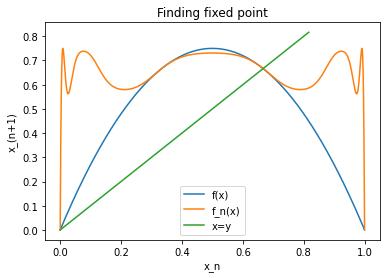

In [320]:
h1=rep(func3,n)
ax = plt.gca()
x1=np.arange(0,1,0.00001)
p=func1()
plt.plot(x1,h1(x1),label='f_n(x)')
pt=fixed_point(func4, x0 ,args=(a,n))
print ("Fixed point:"+str(pt))

plt.plot([0,pt+0.15],[0,pt+0.15], label='x=y')
plt.legend()
plt.title('Finding fixed point')
print('Intersection seems like the fixed point for the function.')

By using a method where the last fixed point is found and then its stability is checked for a function f_n(x) using scipy.optimise.fixed_point after finding the composite function.
I have plotted for an example where the fixed point is stable.

In [321]:
def derivative(x ,a ,n):
    del_x = 0.000000000001
    return (func4(a, x+del_x,n) - func4(a,x,n)) / del_x
stable_root_found = 0;

def is_system_stable(roots, alpha, n):
    return abs(derivative(roots[-1],alpha,n)) <= 1

In [322]:
while(not(stable_root_found)):
    roots = []
    for i in range(n):
        roots.append(float(fixed_point(func4, x0, args=(a,i))))
    stable_root_found = is_system_stable(roots,a,n)
    n+=1

Fixed stable point found at x = 0.6667020625977816


Text(0, 0.5, 'x_(n+1)')

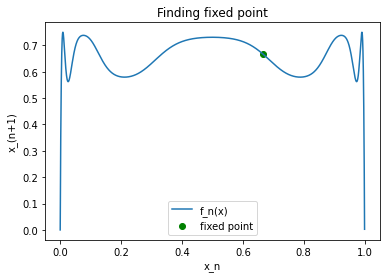

In [325]:
print("Fixed stable point found at x = " +str(roots[-1]))
plt.plot(x1,h1(x1),label="f_n(x)")
plt.scatter(roots[-1],h1(roots[-1]) , label = "fixed point", color="green")
plt.legend()
plt.title('Finding fixed point')
plt.xlabel('x_n')
plt.ylabel('x_(n+1)')


## Task-4
Plot $\alpha$ vs $x^*(\alpha)$. Comment.



In [280]:
%matplotlib inline

In [281]:
def logistic(r, x):
    return r * x * (1 - x)

In [282]:
lc = np.zeros(n)
x4 = 1e-5 * np.ones(n)
iterations = 1000
last = 100
n = 10000
r = np.linspace(2.5, 4.0, n)

Text(0, 0.5, 'x')

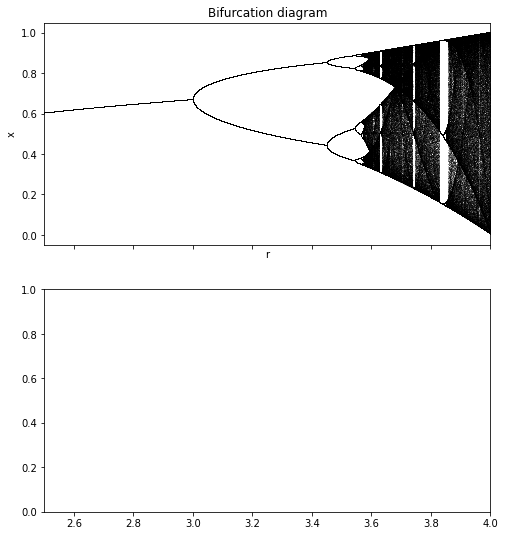

In [327]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),sharex=True)
for i in range(iterations):
    x4 = logistic(r, x4)
    lc += np.log(abs(r - 2 * r * x4))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x4, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")
ax1.set_xlabel('r')
ax1.set_ylabel('x')


## Task-5
Find the ratio between two consequtive bifurcations.